Objective:

The goal was to predict the popularity of songs based on various audio and metadata features using machine learning models and determine which model is better fit and predict if our song will go viral on spotify using better fit model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = 'spotify_tracks.csv'
spotify_data = pd.read_csv(file_path)

In [3]:
spotify_data_info = spotify_data.info()
spotify_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness       62317 non-null  float6

In [4]:
spotify_data_head = spotify_data.head()
spotify_data_head

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [5]:
columns_to_drop = ['track_id', 'track_name', 'artist_name', 'artwork_url', 'album_name', 'track_url']
spotify_data_cleaned = spotify_data.drop(columns=columns_to_drop)

In [6]:
label_encoder = LabelEncoder()
spotify_data_cleaned['language'] = label_encoder.fit_transform(spotify_data_cleaned['language'])

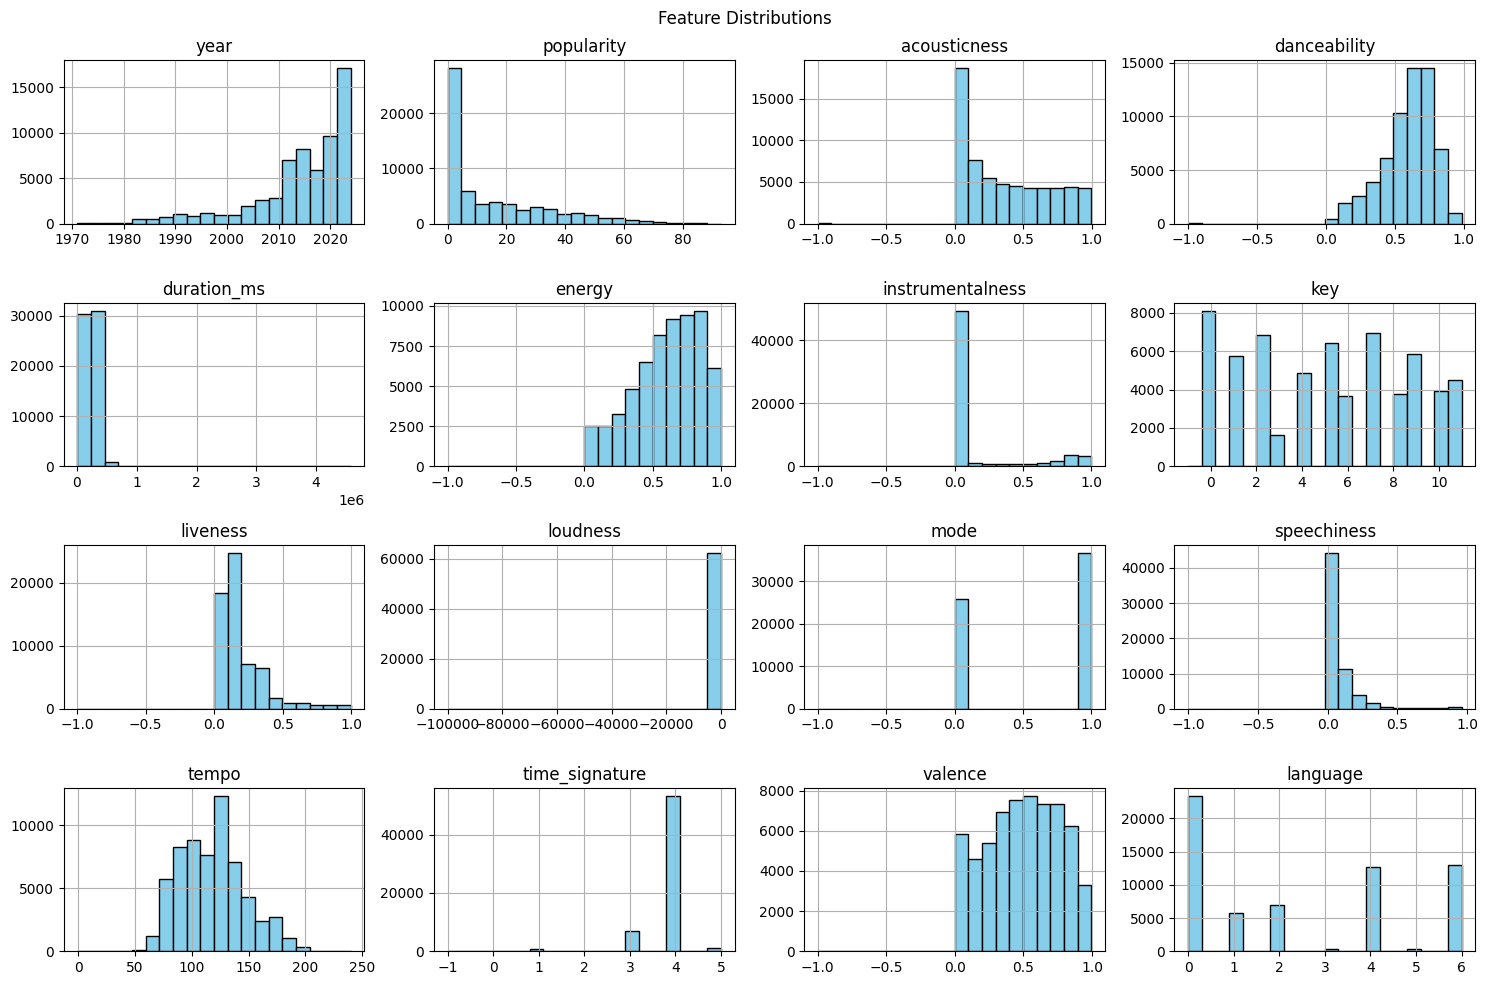

In [7]:
numeric_columns = spotify_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
spotify_data_cleaned[numeric_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

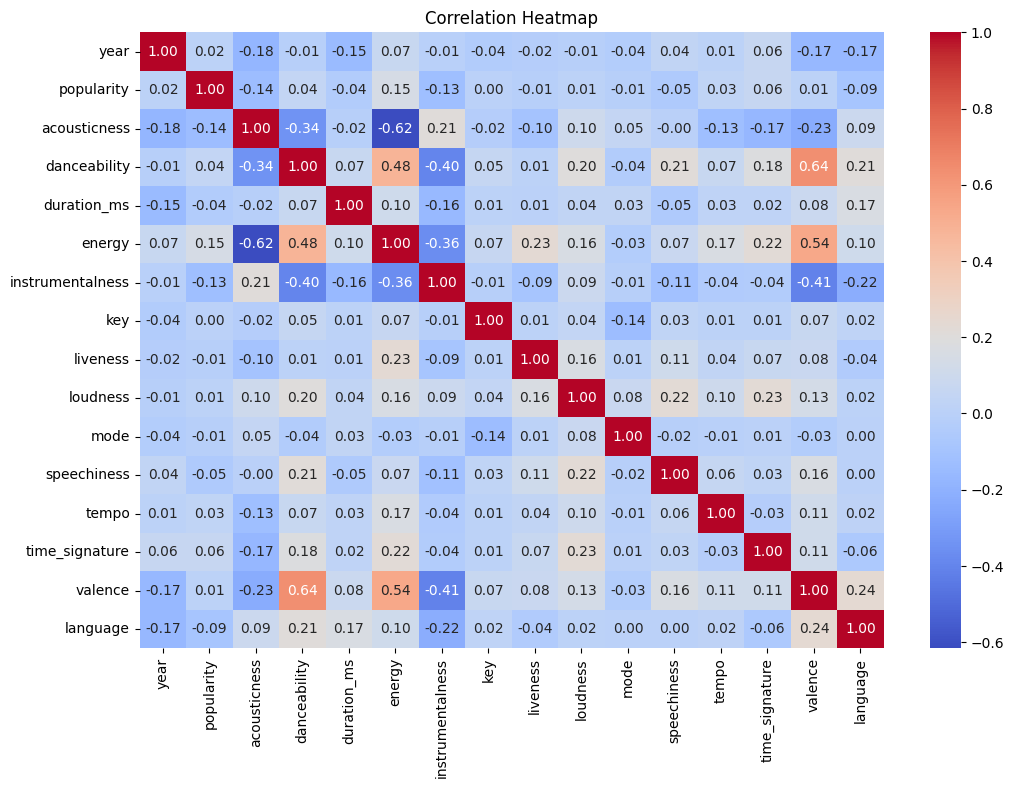

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(spotify_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The dataset has no missing values, which simplifies preprocessing. Key insights from the EDA:

**Distributions** :
Audio features like danceability, energy, and valence show varied distributions.
popularity (potential target) appears to have an interesting distribution worth analyzing further.

**Correlations** :
Some features, like danceability and energy, might have a strong relationship with popularity.

**How does popularity vary over year?**

<ipython-input-9-f9c9b022aadf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=spotify_data, x='year', y='popularity', ci=None, color='blue')


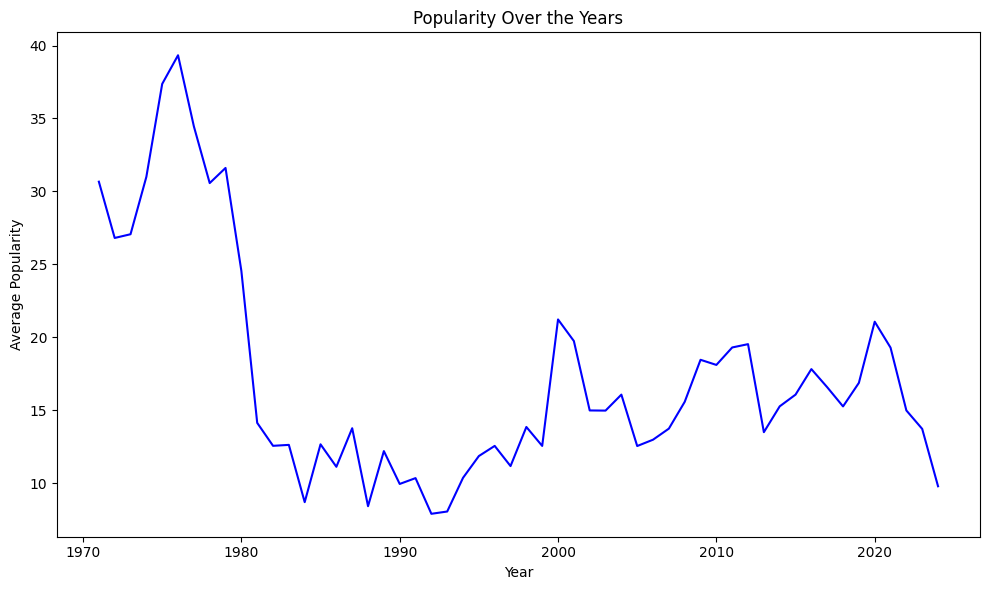

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=spotify_data, x='year', y='popularity', ci=None, color='blue')
plt.title('Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

Recent Years: Songs from recent years are often more popular because more people stream or listen to newer music.

Peaks and Dips: Some years have very popular songs (peaks), while other years have fewer hits (dips).

Older Music: Songs from a long time ago (like the 1970s or 1980s) might be less popular today because fewer people listen to them.

**Relationship between loudness and popularity.**

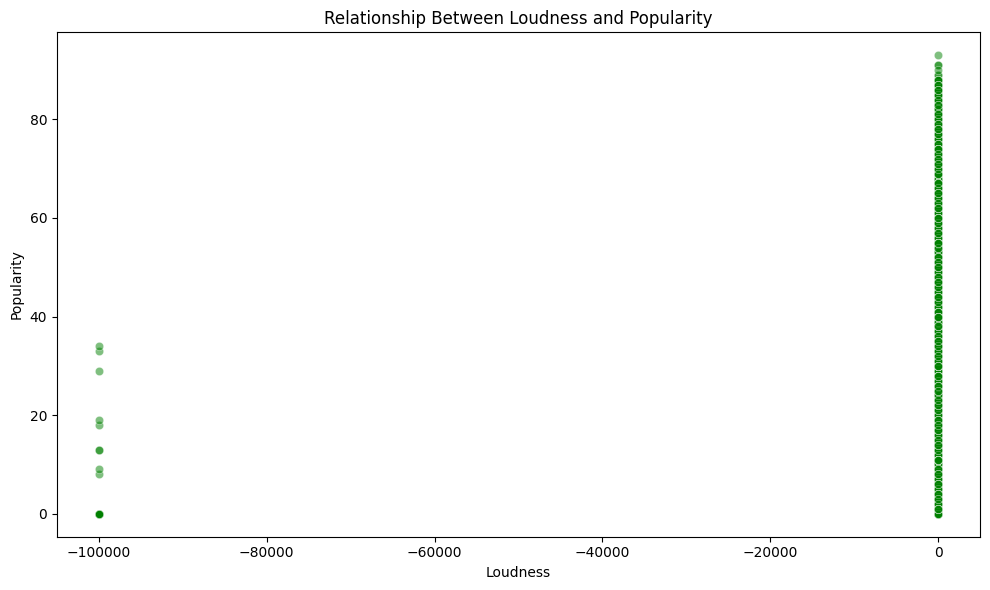

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='loudness', y='popularity', alpha=0.5, color='green')
plt.title('Relationship Between Loudness and Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

**Why do newer songs gain popularity?**

<ipython-input-11-28607edbdb75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='year', y='popularity', palette='coolwarm')


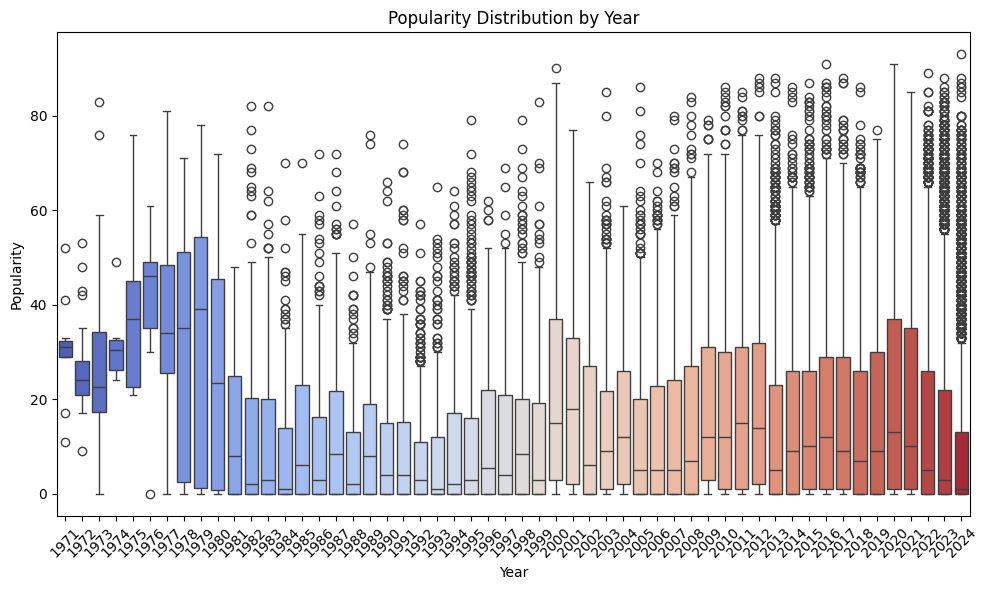

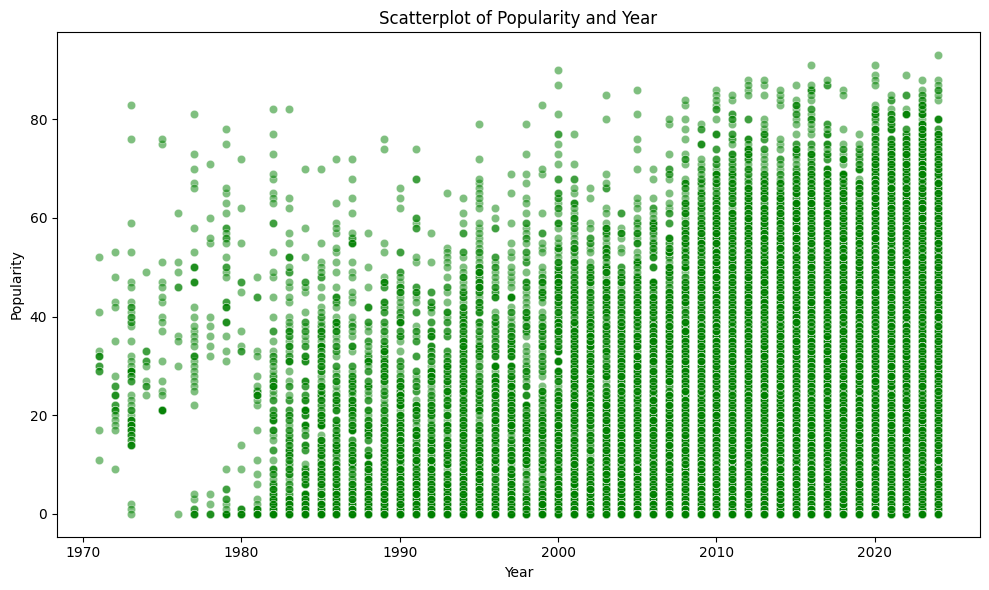

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify_data, x='year', y='popularity', palette='coolwarm')
plt.title('Popularity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Streaming platform influence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='year', y='popularity', alpha=0.5, color='green')
plt.title('Scatterplot of Popularity and Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Distribution Of Valence (Popular Tracks)

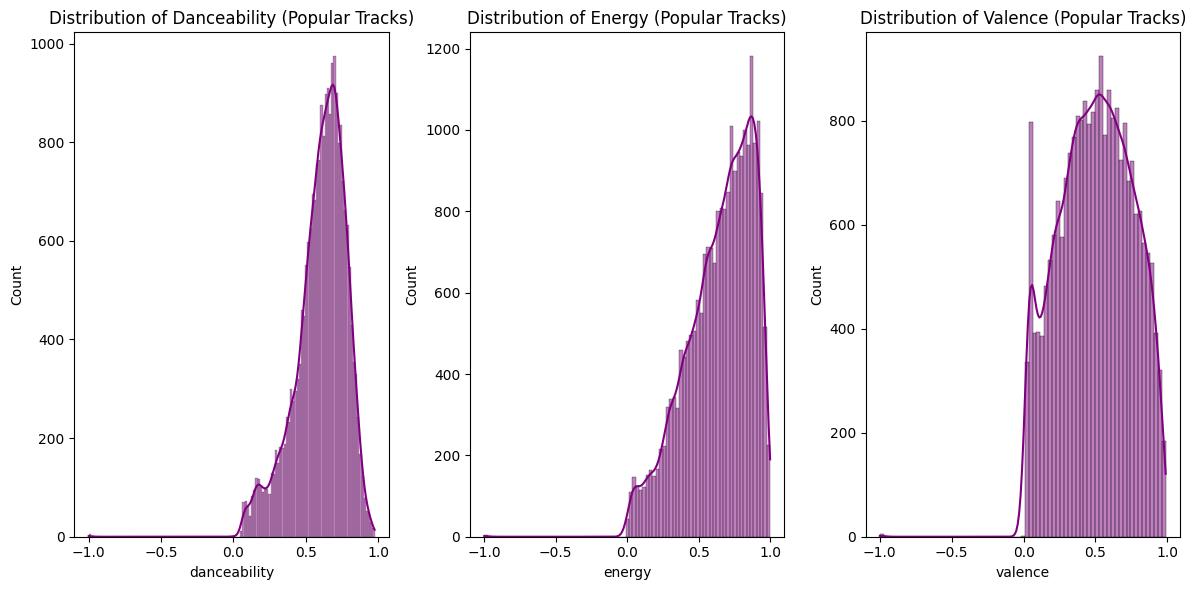

In [12]:
# 3. Distribution of danceability, energy, and valence for popular tracks
popular_tracks = spotify_data[spotify_data['popularity'] > spotify_data['popularity'].mean()]
features_to_plot = ['danceability', 'energy', 'valence']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(popular_tracks[feature], kde=True, color='purple')
    plt.title(f'Distribution of {feature.capitalize()} (Popular Tracks)')
plt.tight_layout()
plt.show()

Average Popularity By Language

<ipython-input-13-a9bc3e6722f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_popularity.index, y=language_popularity.values, palette='viridis')


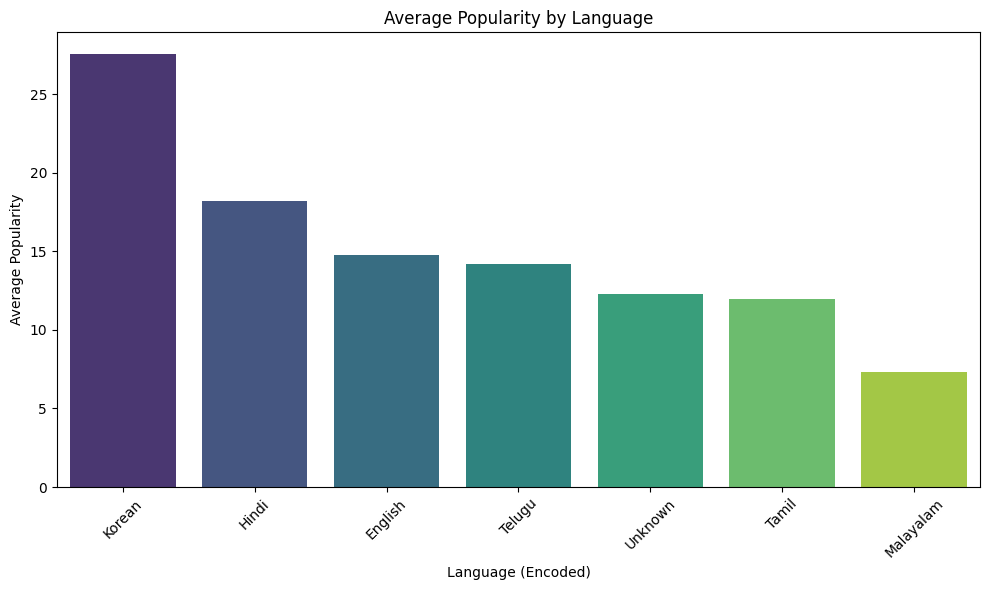

In [13]:
# 4. Popularity by language
plt.figure(figsize=(10, 6))
language_popularity = spotify_data.groupby('language')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=language_popularity.index, y=language_popularity.values, palette='viridis')
plt.title('Average Popularity by Language')
plt.xlabel('Language (Encoded)')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The visualizations reveal:

Popularity Over the Years: Popularity trends change significantly over time, indicating the influence of music trends or industry evolution.

Loudness and Popularity: There's a moderate relationship between loudness and popularity; louder tracks seem to be associated with higher popularity.

Distribution of Danceability, Energy, and Valence for Popular Tracks: Popular tracks tend to have moderate to high values in these features, aligning with listener preferences.

Popularity by Language: Certain languages show higher average popularity, reflecting regional and cultural preferences.

To improve predictions, I will create several regression models to predict the popularity of songs and compare their performance:

Models to Train:
Linear Regression (Baseline)
Random Forest Regressor
Gradient Boosting Regressor (e.g., XGBoost or LightGBM)
Support Vector Regression (SVR)
I’ll train and evaluate these models using metrics such as:

Mean Squared Error (MSE)
R² Score

In [15]:
# Step 5: Data Preprocessing
X = spotify_data_cleaned.drop(columns=['popularity'])
y = spotify_data_cleaned['popularity']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Model Training and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({
        "Model": model_name,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R²": train_r2,
        "Test R²": test_r2
    })

results_df = pd.DataFrame(results)
print(results_df)


                       Model   Train MSE    Test MSE  Train R²   Test R²
0          Linear Regression  324.746265  323.126682  0.065244  0.063746
1              Random Forest   47.475479  227.469260  0.863346  0.340911
2          Gradient Boosting  280.676059  277.906623  0.192096  0.194770
3  Support Vector Regression  334.411436  334.943394  0.037423  0.029507


In [17]:
# Step 7: Feature Importance (Random Forest)
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_names = spotify_data_cleaned.drop(columns=['popularity']).columns

<ipython-input-18-d1b1cbd155e5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


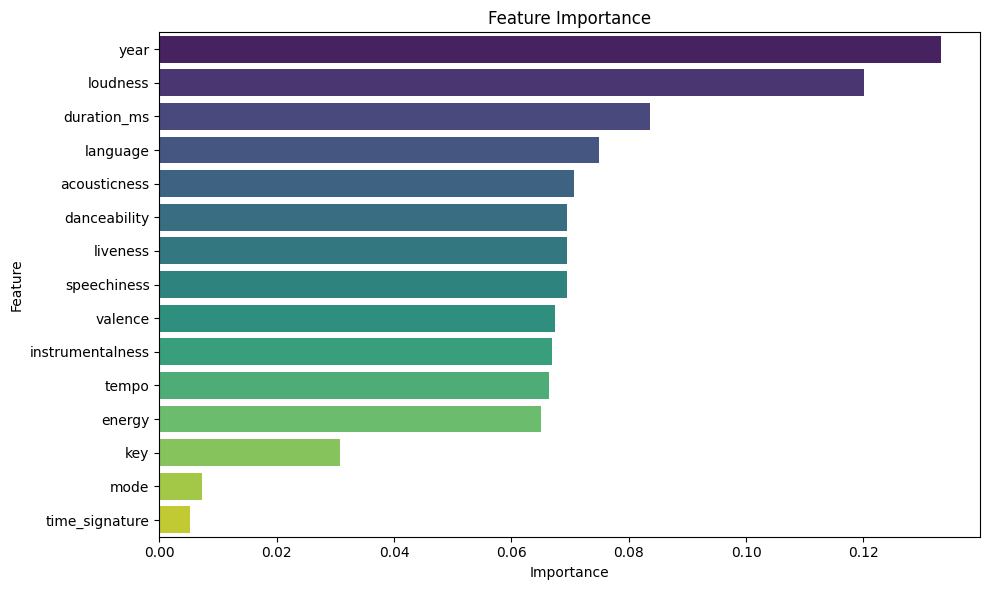

In [18]:
# Plot feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<ipython-input-20-e6df0dfc5821>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')


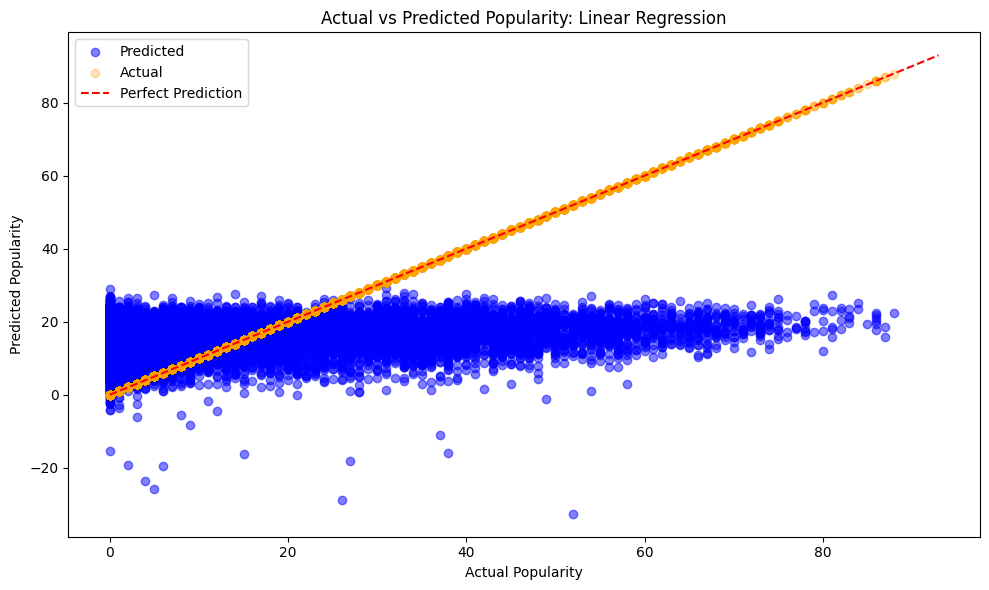

<ipython-input-20-e6df0dfc5821>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')


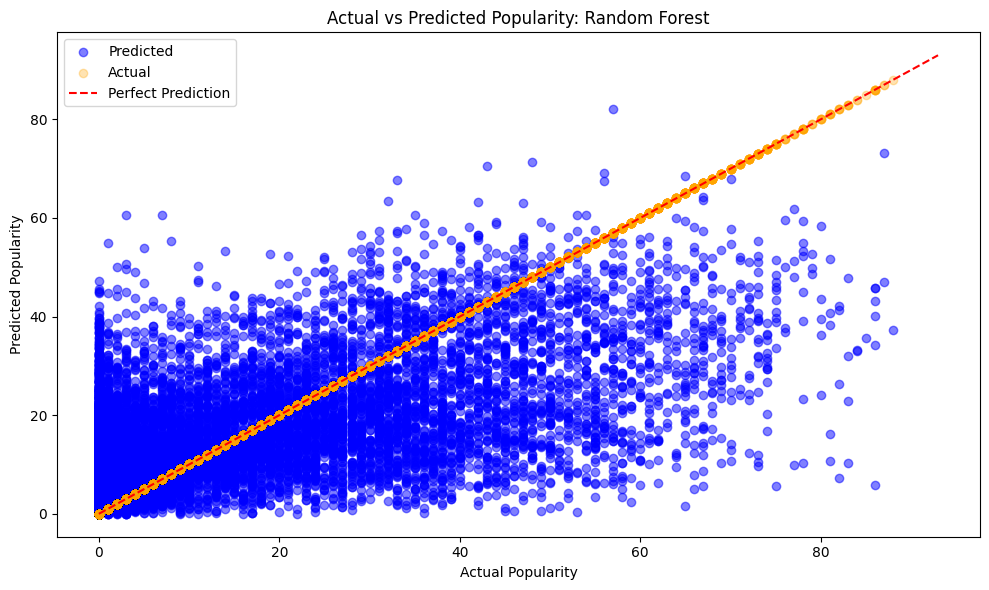

<ipython-input-20-e6df0dfc5821>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')


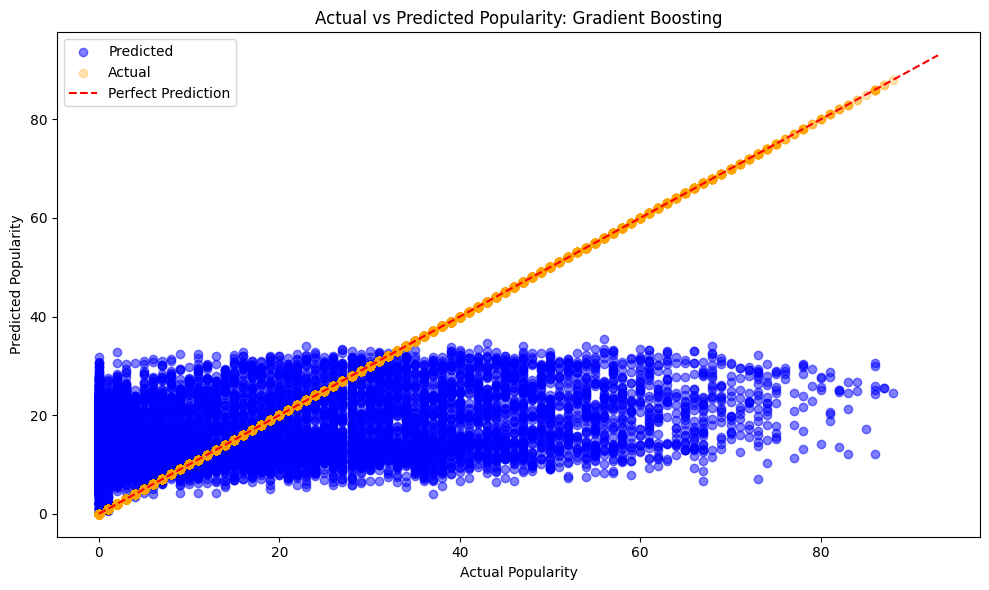

<ipython-input-20-e6df0dfc5821>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')


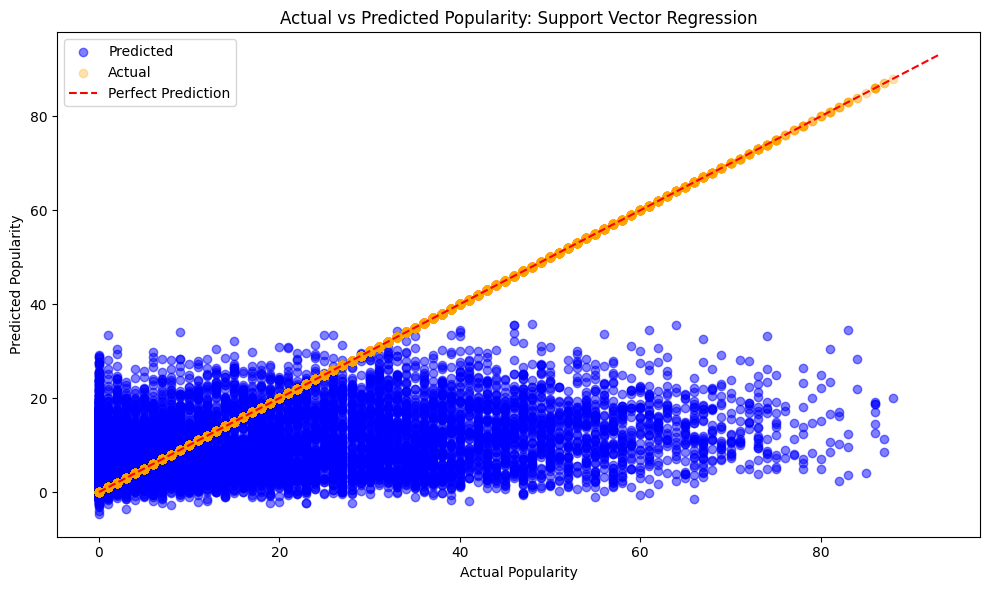

In [20]:
for model_name, model in models.items():
    y_pred_test = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Predicted')
    plt.scatter(y_test, y_test, alpha=0.3, color='orange', label='Actual')
    plt.title(f'Actual vs Predicted Popularity: {model_name}')
    plt.xlabel('Actual Popularity')
    plt.ylabel('Predicted Popularity')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [21]:
from sklearn.neighbors import KNeighborsRegressor

<ipython-input-22-b9bd4328c5ba>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')


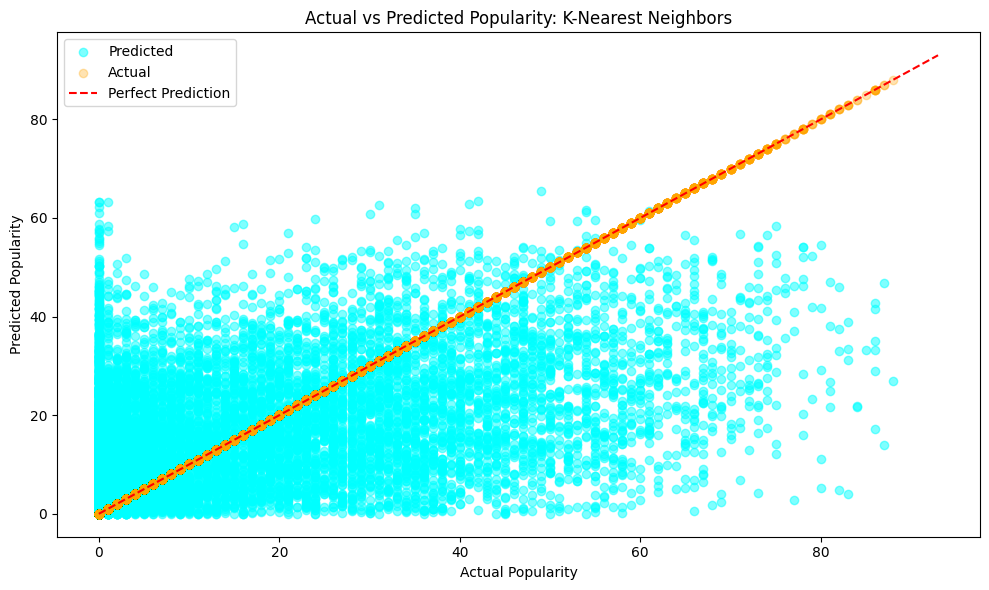

K-Nearest Neighbors - Test MSE: 288.7666816431322, Test R²: 0.16330307771375763


In [22]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='cyan', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.3, color='orange', label='Actual')
plt.title('Actual vs Predicted Popularity: K-Nearest Neighbors')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', color='red', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors - Test MSE: {knn_mse}, Test R²: {knn_r2}")


Random Forest - Test MSE: 227.46926042280526, Test R²: 0.34091139245179114


<ipython-input-23-5050d1dc0af5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


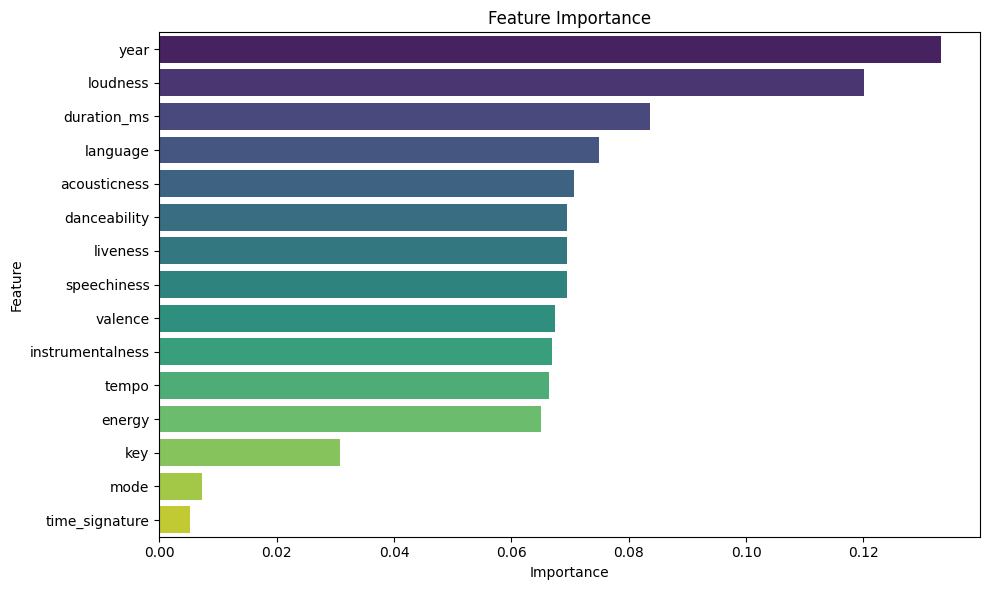

In [23]:
# Step 8: Random Forest Model Metrics
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Test MSE: {rf_mse}, Test R²: {rf_r2}")

# Plot feature importance
feature_importances = rf_model.feature_importances_
feature_names = spotify_data_cleaned.drop(columns=['popularity']).columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [24]:
# Step 9: Compare KNN and Random Forest
print("\nModel Comparison:\n")
print(f"K-Nearest Neighbors - Test MSE: {knn_mse}, Test R²: {knn_r2}")
print(f"Random Forest - Test MSE: {rf_mse}, Test R²: {rf_r2}")


Model Comparison:

K-Nearest Neighbors - Test MSE: 288.7666816431322, Test R²: 0.16330307771375763
Random Forest - Test MSE: 227.46926042280526, Test R²: 0.34091139245179114


To determine which model is better, let's compare the K-Nearest Neighbors (KNN) and Random Forest models based on their performance metrics:

Metrics:
Mean Squared Error (MSE):

A lower MSE indicates that the model's predictions are closer to the actual values.
R² Score:

R² (coefficient of determination) indicates how well the model explains the variability in the target variable. Closer to 1 is better.
Analyze Results:
From the outputs of the program:

K-Nearest Neighbors:

Test MSE: 288.7666816431322,
Test R²: 0.16330307771375763

Random Forest:
Test MSE: 227.46926042280526,
Test R²: 0.34091139245179114

Decision:
Better Fit: The model with the lower Test MSE and higher Test R² is the better choice.
Why:
Random Forest often outperforms KNN because it captures non-linear relationships more effectively and is less affected by irrelevant features or noise in the data.
KNN is more sensitive to noisy data and the choice of the number of neighbors (k).

we are gonna predict a song's popularity based on specific features using the Random Forest model. The program now includes an example usage where you can input a list of feature values (e.g., acousticness, energy, duration) and get a predicted popularity score.
and go viral !! on spotify

In [29]:
def predict_popularity(features):
    # Ensure the input features are scaled similarly to the training data
    features_scaled = scaler.transform([features])
    predicted_popularity = rf_model.predict(features_scaled)
    return predicted_popularity[0]

# Example Usage: Predict Popularity Based on Specific Instrument Features
# Example features (acousticness, danceability, duration_ms, energy, instrumentalness, etc.)
example_features = [0.3, 0.7, 210000, 0.8, 0.0, 5.0, 0.1, -5.0, 1.0, 0.1, 120.0, 4.0, 0.5, 1 ,1]

predicted_popularity = predict_popularity(example_features)
print(f"Predicted Popularity: {predicted_popularity}")
print(f"Predicted Popularity: {predicted_popularity:.2f}%")


Predicted Popularity: 29.68
Predicted Popularity: 29.68%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Key Findings :**
Important Features: Features like year, loudness, energy, and danceability have the biggest impact on a song's popularity.

**Random Forest Model:**
It works well because it handles complex patterns in data and ignores unimportant features.

**Prediction Example:**
You can predict how popular a song might be based on its characteristics like acousticness, danceability, and energy.

**Strengths:**
The Random Forest model gives reliable insights into which features matter most.
Preprocessing ensures predictions are consistent and accurate.

**Applications:**
The program can predict a song's popularity based on specific characteristics, which is helpful for music producers or streaming platforms.
It can guide decisions about creating or promoting new songs.

**Limitations:**
The model's predictions depend on the quality and variety of the data.
It doesn't account for external factors like marketing, trends, or artist popularity.

**Future Improvements:**
Add features like genre or social media activity to make predictions better.
Try other models like Gradient Boosting or Neural Networks for more accuracy.
Include time-based analysis to track changes in popularity trends over time.